# HW05 — Линейные модели и честный ML-эксперимент

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    classification_report,
)


## Загрузка данных и первичный анализ

In [45]:
df = pd.read_csv("S05-hw-dataset.csv")
df.head()


,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

In [34]:
df.shape

(3000, 17)

In [35]:
df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
client_id,3000.0,1500.500000,866.169729,1.000000,750.750000,1500.500000,2250.250000,3000.000000
age,3000.0,45.059667,14.192883,21.000000,33.000000,45.000000,57.000000,69.000000
income,3000.0,69658.992000,24742.235182,15000.000000,52641.750000,69784.500000,85874.250000,156351.000000
years_employed,3000.0,19.577667,11.381497,0.000000,10.000000,20.000000,29.000000,39.000000
credit_score,3000.0,649.285333,69.955852,402.000000,604.000000,647.000000,697.000000,850.000000
debt_to_income,3000.0,0.284065,0.161112,0.006147,0.157796,0.261726,0.388886,0.878343
num_credit_cards,3000.0,3.494667,2.289917,0.000000,1.000000,3.000000,6.000000,7.000000
num_late_payments,3000.0,6.869333,4.291278,0.000000,3.000000,7.000000,10.000000,14.000000
has_mortgage,3000.0,0.495000,0.500058,0.000000,0.000000,0.000000,1.000000,1.000000
has_car_loan,3000.0,0.501333,0.500082,0.000000,0.000000,1.000000,1.000000,1.000000


In [36]:
# Распределение таргета
target_col = "default"

df[target_col].value_counts(dropna=False), df[target_col].value_counts(normalize=True, dropna=False)

(default
 0    1769
 1    1231
 Name: count, dtype: int64,
 default
 0    0.589667
 1    0.410333
 Name: proportion, dtype: float64)

- Размер датасета: 3000 строк, 17 признаков.
- Пропусков нет.
- Явные аномалии/неправдоподобные значения: явных аномалий не обнаружено.
- Таргет умеренно несбалансирован: default=1 ≈ 41.0%, default=0 ≈ 59.0%.


## Подготовка признаков и таргета

In [37]:
# Убираем технический ID (если есть)
id_col = "client_id"
feature_cols = [c for c in df.columns if c not in [target_col, id_col]]

X = df[feature_cols].copy()
y = df[target_col].copy()

# Быстрая проверка: все ли признаки числовые
non_numeric = [c for c in X.columns if not pd.api.types.is_numeric_dtype(X[c])]
non_numeric


[]

In [38]:
# Пример простых проверок диапазонов (не обязательно, но полезно)
if "debt_to_income" in X.columns:
    dti_min, dti_max = float(X["debt_to_income"].min()), float(X["debt_to_income"].max())
    print("debt_to_income range:", dti_min, dti_max)


debt_to_income range: 0.0061471149847966 0.878343349584274


## Train/Test split + бейзлайн

In [39]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=y,
)

X_train.shape, X_test.shape


((2250, 15), (750, 15))

In [40]:
# Бейзлайн: "most_frequent" (предсказывает самый частый класс)
dummy = DummyClassifier(strategy="most_frequent", random_state=RANDOM_STATE)
dummy.fit(X_train, y_train)

y_pred_dummy = dummy.predict(X_test)

# Для ROC-AUC нужны вероятности
y_proba_dummy = dummy.predict_proba(X_test)[:, 1]

acc_dummy = accuracy_score(y_test, y_pred_dummy)
auc_dummy = roc_auc_score(y_test, y_proba_dummy)

acc_dummy, auc_dummy


(0.5893333333333334, 0.5)

DummyClassifier — это точка отсчёта: он не учится паттернам в данных, а предсказывает по простой стратегии.
Важно сравнивать "умную" модель с бейзлайном, чтобы понять, есть ли реальная польза от обучения.


## Logistic Regression + подбор C

In [41]:
# Pipeline: StandardScaler + LogisticRegression
# Используем solver='liblinear'
def make_logreg(C: float) -> Pipeline:
    return Pipeline([
        ("scaler", StandardScaler()),
        ("logreg", LogisticRegression(C=C, max_iter=2000, solver="liblinear", random_state=RANDOM_STATE)),
    ])

C_grid = [0.01, 0.1, 1.0, 10.0, 100.0]

results = []
best_model = None
best_auc = -np.inf

for C in C_grid:
    model = make_logreg(C)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    results.append({"model": "logreg", "C": C, "accuracy": acc, "roc_auc": auc})

    if auc > best_auc:
        best_auc = auc
        best_model = model

results_df = pd.DataFrame(results).sort_values("roc_auc", ascending=False)
results_df


,model,C,accuracy,roc_auc
3,logreg,10.00,0.793333,0.864746
4,logreg,100.00,0.793333,0.864746
2,logreg,1.00,0.793333,0.864738
1,logreg,0.10,0.793333,0.864709
0,logreg,0.01,0.798667,0.864320


In [42]:
# Метрики лучшей модели
y_pred_lr = best_model.predict(X_test)
y_proba_lr = best_model.predict_proba(X_test)[:, 1]

acc_lr = accuracy_score(y_test, y_pred_lr)
auc_lr = roc_auc_score(y_test, y_proba_lr)

print("Best LogisticRegression")
print("accuracy:", acc_lr)
print("roc_auc:", auc_lr)

print("\nConfusion matrix:")
print(confusion_matrix(y_test, y_pred_lr))

print("\nClassification report:")
print(classification_report(y_test, y_pred_lr, digits=3))


Best LogisticRegression
accuracy: 0.7933333333333333
roc_auc: 0.864745548569078

Confusion matrix:
[[382  60]
 [ 95 213]]

Classification report:
              precision    recall  f1-score   support

           0      0.801     0.864     0.831       442
           1      0.780     0.692     0.733       308

    accuracy                          0.793       750
   macro avg      0.791     0.778     0.782       750
weighted avg      0.792     0.793     0.791       750



## ROC-кривая + сохранение в figures/

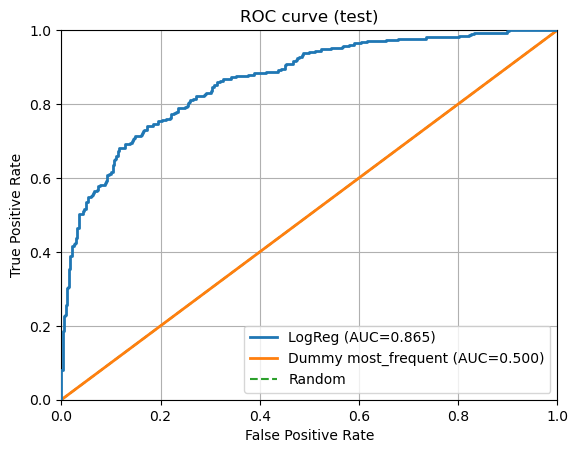

In [43]:
fpr_d, tpr_d, _ = roc_curve(y_test, y_proba_dummy)
fpr_l, tpr_l, _ = roc_curve(y_test, y_proba_lr)

plt.figure()
plt.plot(fpr_l, tpr_l, label=f"LogReg (AUC={auc_lr:.3f})", linewidth=2, zorder=3)
plt.plot(fpr_d, tpr_d, label=f"Dummy most_frequent (AUC={auc_dummy:.3f})", linewidth=2, zorder=2)
plt.plot([0, 1], [0, 1], linestyle="--", linewidth=1.5, label="Random", zorder=1)

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve (test)")
plt.legend(loc="lower right")
plt.grid(True)

plt.savefig('figures/roc_curve.png', dpi=150, bbox_inches="tight")
plt.show()


## Сравнение моделей

In [44]:
summary_table = pd.DataFrame([
    {"model": "Dummy (most_frequent)", "accuracy": acc_dummy, "roc_auc": auc_dummy},
    {"model": "LogReg (best C)", "accuracy": acc_lr, "roc_auc": auc_lr},
]).sort_values("roc_auc", ascending=False)

summary_table


,model,accuracy,roc_auc
1,LogReg (best C),0.793333,0.864746
0,Dummy (most_frequent),0.589333,0.500000


## Итоговые выводы

- Бейзлайн DummyClassifier показал accuracy = 0.589, ROC-AUC = 0.500. Это ожидаемо: он всегда предсказывает самый частый класс, поэтому AUC как у случайного.
- Логистическая регрессия показала accuracy = 0.793, ROC-AUC = 0.865, что лучше бейзлайна на +0.204 по accuracy и +0.365 по ROC-AUC.
- При переборе C качество почти не меняется: ROC-AUC держится около 0.865, значит модель не очень чувствительна к регуляризации в этом диапазоне.
- Итог: разумнее использовать логистическую регрессию, потому что она заметно лучше бейзлайна и хорошо ранжирует риск дефолта.
